# Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

# Dataset link: https://drive.googIe.com/fiIe/d/1bGoIE4Z2kG5nyh-fGZAJ7LHOki3UfmSJ/view?usp=share_link
# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

# Q2. Split the dataset into a training set (70%) and a test set (30%).

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer ## HAndle Missing Values
from sklearn.preprocessing import StandardScaler ## Feature Scaling
from sklearn.preprocessing import OneHotEncoder ## categorical to numerical
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV



In [4]:
df = pd.read_csv(r"C:\Users\milan\Documents\Data Science\skills\Notes\Pandas_\New Assq\datase.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
## independent and dependent feature
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [74]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', ]

In [75]:
## feature Engineering Automation
## Numerical Pipelines
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##Missing Values
        ('scaler',StandardScaler()) ## feature Scaling
    ]

)

#categorical Pipeline
cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')), ## handling Missing values
                ('onehotencoder',OneHotEncoder()) ## Categorical features to numerical
                ]

            )  


preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])



X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters. 

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and Fl score.

In [82]:
# X_train and y_train are the features and labels of the training set, respectively
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [85]:
# X_test and y_test are the features and labels of the test set, respectively
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)


Accuracy:  0.8131868131868132
Precision:  0.8367346938775511
Recall:  0.82
F1 score:  0.8282828282828283


# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [136]:
top_features_df = pd.DataFrame({'Feature': top_features.index, 'Importance': top_features.values})
top_features_df

,Feature,Importance
0,age,21
1,sex,28
2,cp,4
3,trestbps,3
4,chol,7
5,fbs,0
6,restecg,2
7,thalach,1
8,exang,29
9,oldpeak,16


In [141]:
import plotly.express as px

# Set a different color for the top 5 features
top_n = 5
color_list = ['#1f77b4'] * top_n
color_list.reverse()

# Create a bar chart using Plotly Express
fig = px.bar(top_features_df.sort_values(by='Importance').tail(top_n), 
             x='Importance', y='Feature', orientation='h',
             color=color_list,
             title='Top 5 Features for Heart Disease Risk Prediction')

fig.show()


# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [146]:
# Define the hyperparameters that you want to tune

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the model to the training set
grid_search.fit(X_train, y_train)

# Evaluate the model on the test set
score = grid_search.score(X_test, y_test)

# Print the best parameters
print(grid_search.best_params_)

# Print the best score
print(score)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
0.8351648351648352


# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [148]:
# Evaluate the performance of the tuned model
tuned_rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
tuned_rfc.fit(X_train, y_train)

tuned_pred = tuned_rfc.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_pred)
tuned_precision = precision_score(y_test, tuned_pred)
tuned_recall = recall_score(y_test, tuned_pred)
tuned_f1_score = f1_score(y_test, tuned_pred)

print('Tuned model performance metrics:')
print('Accuracy: ', tuned_accuracy)
print('Precision: ', tuned_precision)
print('Recall: ', tuned_recall)
print('F1 score: ', tuned_f1_score)


Tuned model performance metrics:
Accuracy:  0.8241758241758241
Precision:  0.84
Recall:  0.84
F1 score:  0.8399999999999999


# Default model performance metrics:
 - Accuracy:  0.8131868131868132
 - Precision:  0.8367346938775511
 - Recall:  0.82
 - F1 score:  0.8282828282828283

# Tuned model performance metrics:
 - Accuracy:  0.8241758241758241
 - Precision:  0.84
 - Recall:  0.84
 - F1 score:  0.8399999999999999


# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



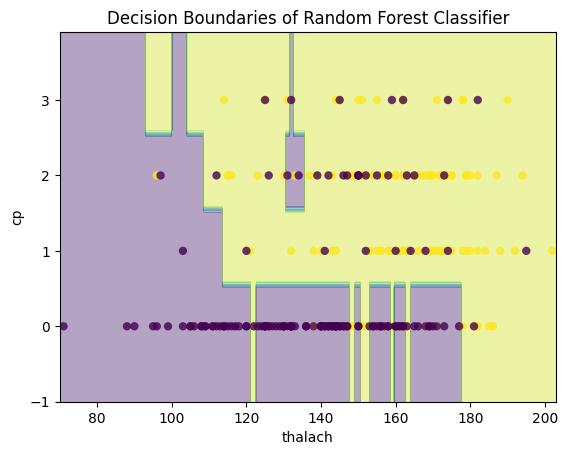

In [154]:
# Select the two most important features
X = df[['thalach', 'cp']]
y = df['target']

# Train the random forest classifier
rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc.fit(X, y)

# Define the boundaries of the plot
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Generate the predictions for each point in the meshgrid
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.8, edgecolors='none')
plt.xlabel('thalach')
plt.ylabel('cp')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()


c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



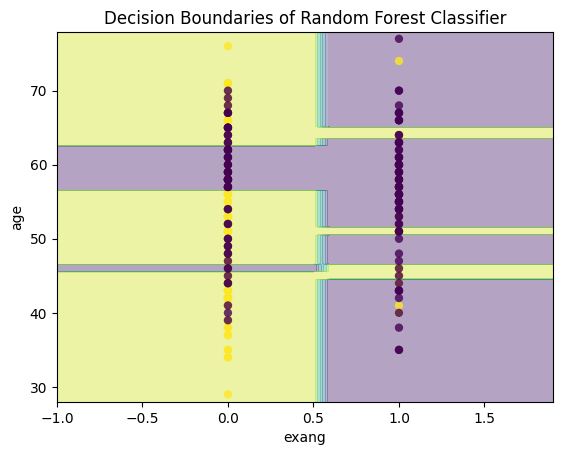

In [157]:
# Select the two most important features
X = df[['exang', 'age']]
y = df['target']

# Train the random forest classifier
rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc.fit(X, y)

# Define the boundaries of the plot
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Generate the predictions for each point in the meshgrid
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.8, edgecolors='none')
plt.xlabel('exang')
plt.ylabel('age')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()
